In [3]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1), (2,2), (8,3), (5,3)]

In [4]:
rota = [origem] + enderecos + [destino]

In [5]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

In [6]:
import matplotlib.pyplot as plt

In [7]:
!pip install scipy

In [8]:
from scipy.spatial.distance import euclidean as distancia_euclidiana

13.733044070171104


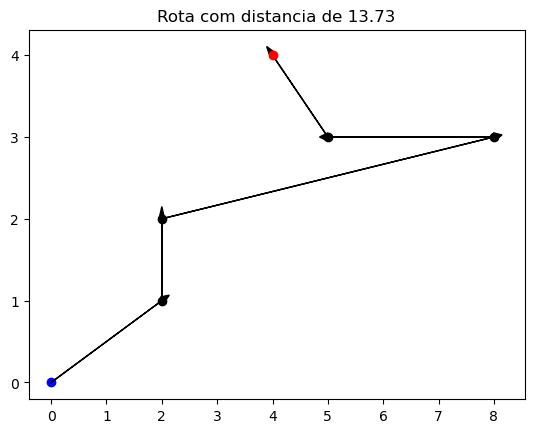

In [9]:
tamanho_rota = len(rota)
distancia_percorrida = 0

for i in range(tamanho_rota):
    x,y = rota[i]
    cor = "black"
    if i == 0:
        cor = "blue"
    elif i == tamanho_rota - 1:
        cor = "red"
    plt.scatter(x,y, color = cor)
    if i < tamanho_rota - 1:
        x1,y1 = rota[i+1]
        dx= x1 - x
        dy = y1 - y
        plt.arrow(x,y, dx, dy, color = 'black', head_width = 0.1 )
        distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])
        
plt.title(f'Rota com distancia de {distancia_percorrida:.2f}')
print(distancia_percorrida)

In [10]:
def desenhar_rota(origem, destino, enderecos):
    rota = [origem] + enderecos + [destino]
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]
        cor = "black"
        if i == 0:
            cor = "blue"
        elif i == tamanho_rota - 1:
            cor = "red"
        plt.scatter(x,y, color = cor)
        if i < tamanho_rota - 1:
            x1,y1 = rota[i+1]
            dx= x1 - x
            dy = y1 - y
            plt.arrow(x,y, dx, dy, color = 'black', head_width = 0.1 )
            distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])
            
    plt.title(f'Rota com distancia de {distancia_percorrida:.2f}')
    print(distancia_percorrida)

14.567196007456046


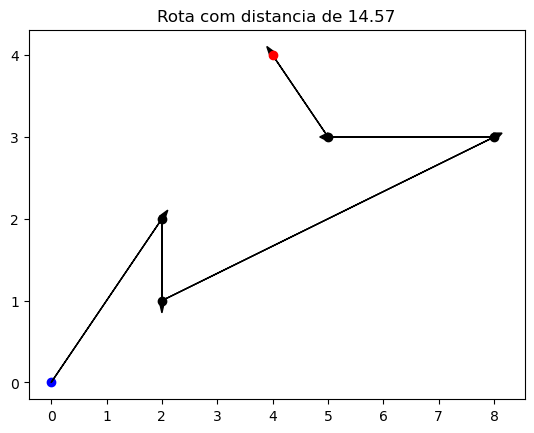

In [11]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1), (8,3), (5,3)]

desenhar_rota(origem, destino, enderecos)

In [12]:
from itertools import permutations

In [13]:
def calcular_distancia_rota(rota):
    distancia = 0
    tamanho_rota = len(rota)
    for i in range(tamanho_rota):
        if i < tamanho_rota - 1:
            distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])
    return distancia

In [14]:
def desenhar_rota(rota):
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]
        cor = "black"
        if i == 0:
            cor = "blue"
        elif i == tamanho_rota - 1:
            cor = "red"
        plt.scatter(x,y, color = cor)
        if i < tamanho_rota - 1:
            x1,y1 = rota[i+1]
            dx= x1 - x
            dy = y1 - y
            plt.arrow(x,y, dx, dy, color = 'black', head_width = 0.1 )
            distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])
            
    plt.title(f'Rota com distancia de {distancia_percorrida:.2f}')
    print(distancia_percorrida)

In [15]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3)]

rota = [origem] + enderecos + [destino]

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583
13.52145126328583


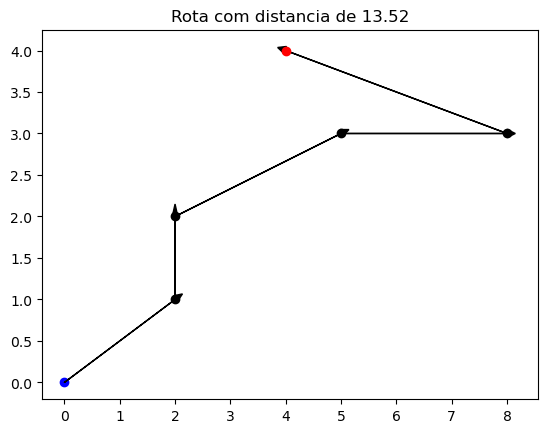

In [16]:
menor_distancia = float('inf')
menor_rota = None
for permutacao in permutations(enderecos):
    rota = [origem] + list(permutacao) + [destino]
    distancia_rota = calcular_distancia_rota(rota)

    if distancia_rota < menor_distancia:
        menor_distancia = distancia_rota
        menor_rota = rota

print(menor_rota, menor_distancia)
desenhar_rota(menor_rota)



# Método da força bruta(exaustivo)

In [17]:
def forca_bruta(origem, destino, enderecos):
    menor_distancia = float('inf')
    menor_rota = None
    for permutacao in permutations(enderecos):
        rota = [origem] + list(permutacao) + [destino]
        distancia_rota = calcular_distancia_rota(rota)

        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    return(menor_rota, menor_distancia)



In [18]:
# origem = (0,0)
# destino = (4,4)

# enderecos = [(2,2), (2,1), (5,3), (8,3), (10,5), (9,4), (8,7), (6,3), (9,6), (7,5)]

# menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
# desenhar_rota(menor_rota)

# Vizinho mais proximo (abordagem gulosa)

In [19]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3)]

In [20]:
def vizinho_mais_proximo(origem, destino, endereco):

    ponto_atual = origem
    enderecos_restantes = enderecos.copy()

    distancia_percorrida = 0
    menor_rota = [ponto_atual]

    while enderecos_restantes:
        # Encontrar o ponto mais proximo do ponto atual
        menor_distancia = float('inf')
        ponto_mais_proximo = None
        for endereco in enderecos_restantes:
            distancia = distancia_euclidiana(ponto_atual, endereco)
            if distancia < menor_distancia:
                menor_distancia = distancia
                ponto_mais_proximo = endereco
                
        #remover esse ponto da lista de enderecos
        enderecos_restantes.remove(ponto_mais_proximo)
        #adicionar esse ponto na menor_rota
        menor_rota.append(ponto_mais_proximo)
        #atualizar a distancia_percorrida
        distancia_percorrida = distancia_percorrida + menor_distancia
        #atualizar o ponto atual
        ponto_atual = ponto_mais_proximo
        
    menor_rota.append(destino)
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual, destino)

    return menor_rota, distancia_percorrida

20.45354552482872


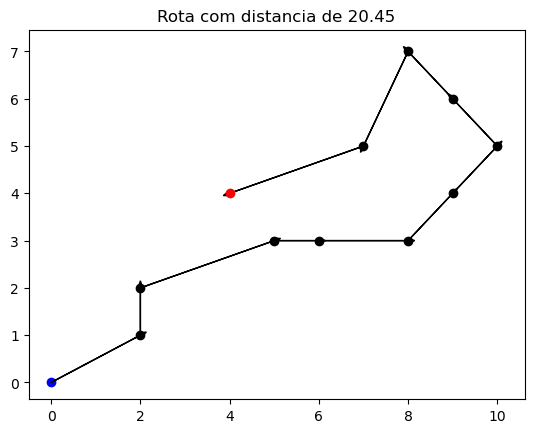

In [21]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3), (10,5), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

19.373182497877814


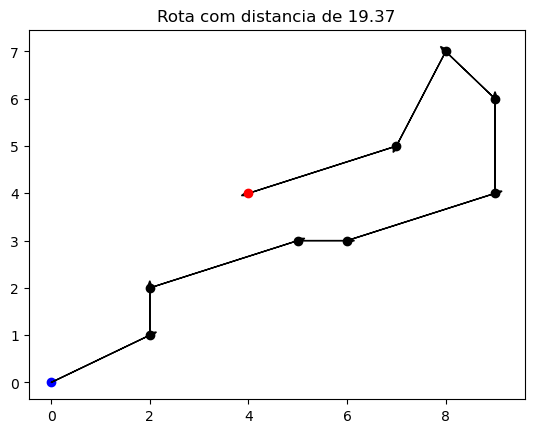

In [22]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

20.284695155040843


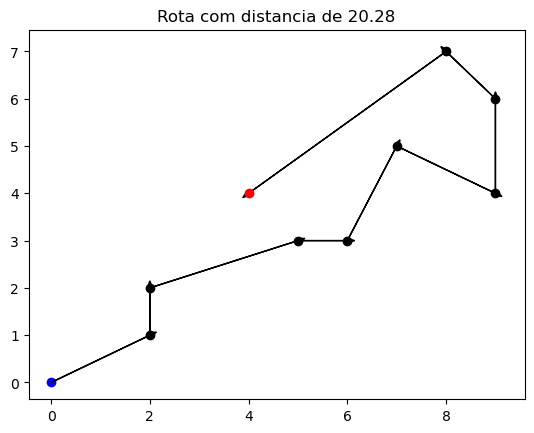

In [23]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

# Algoritmos géneticos

In [24]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1), (2,2), (8,3), (5,3)]

In [25]:
# função de avaliação

# individuo = [0, 1, 2, 3]

def avaliar(individuo, origem, enderecos, destino):
    rota = [origem]
    for i in individuo:
        rota.append(enderecos[i])
    rota.append(destino)
    
    distancia_percorrida = calcular_distancia_rota(rota)
    
    return distancia_percorrida,

In [26]:
!pip install deap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 262.6 kB/s eta 0:00:04
     - -------------------------------------- 0.0/1.1 MB 262.6 kB/s eta 0:00:04
     ----- ---------------------------------- 0.1/1.1 MB 655.8 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.1 MB 695.5 kB/s eta 0:00:02
     -------- ------------------------------- 0.2/1.1 MB 724.0 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.1 MB 741.6 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.1 MB 741.6 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.1 MB 741.6 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.1 MB 589.5 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.1 MB 589.5 kB/s

In [27]:
from deap import base, creator, tools, algorithms
import numpy as np

In [28]:
# Definição do tamanho da população inicial
tam_populacao_inicial = 100

# Probabilidade de cruzamento entre indivíduos
prob_cruzamento = 0.7

# Probabilidade de mutação de um gene em um indivíduo
prob_mutacao = 0.1

# Número total de gerações que o algoritmo irá evoluir
numero_geracoes = 100

# Criação de uma classe chamada 'FitnessMin' que define o objetivo como minimizar a função de aptidão
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))

# Criação de uma classe chamada 'individuo' que representa um indivíduo, sendo uma lista com atributo de aptidão definido pela classe 'FitnessMin'
creator.create('Individuo', list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Registro de uma função chamada 'Genes' que utiliza a função np.random.permutation para gerar uma permutação aleatória dos genes com base no número de 'enderecos'
toolbox.register("Genes", np.random.permutation, len(enderecos))

# Registro de uma função chamada 'Individuos' que inicializa um indivíduo chamando a função 'initIterate' com base na classe 'individuo' e na função 'Genes'
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

# Registro de uma função chamada 'Populacao' que inicializa uma população com base na função 'initRepeat', utilizando a lista e a função 'Individuos' registrada anteriormente
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

# Inicialização da população com o tamanho definido previamente
populacao = toolbox.Populacao(n=tam_populacao_inicial)

# Registro de operadores genéticos: cruzamento, mutação, seleção e avaliação
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

# Configuração do algoritmo genético: algoritmo eaSimple da biblioteca DEAP, utilizando os operadores registrados, probabilidade de cruzamento e mutação, número de gerações e sem exibição de informações durante a execução (verbose=False)
algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,
                                mutpb=prob_cruzamento,
                                ngen=numero_geracoes,
                                verbose=False)

# Seleção do melhor indivíduo da população após a evolução
melhor_ind = tools.selBest(populacao, 1)[0]


In [29]:
melhor_ind

[0, 1, 3, 2]

13.52145126328583


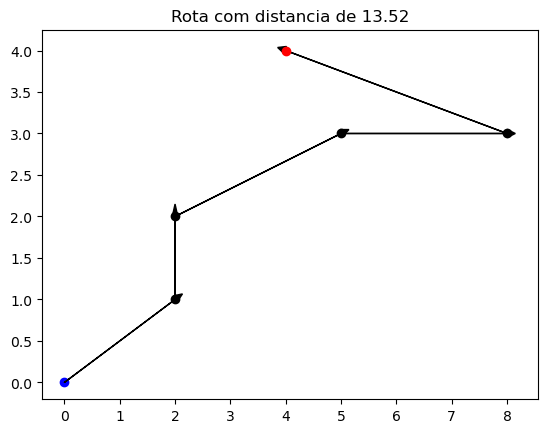

In [30]:
menor_rota = [origem] 
for i in melhor_ind:
    menor_rota.append(enderecos[i])
menor_rota.append(destino)

desenhar_rota(menor_rota)

In [31]:
def algoritmo_genetico(origem,destino, enderecos,tam_populacao_inicial = 100, prob_cruzamento = 0.7, prob_mutacao = 0.1, numero_geracoes = 100):
    # Definição do tamanho da população inicial
    # Probabilidade de cruzamento entre indivíduos
    # Probabilidade de mutação de um gene em um indivíduo
    # Número total de gerações que o algoritmo irá evoluir

    # Criação de uma classe chamada 'FitnessMin' que define o objetivo como minimizar a função de aptidão
    creator.create('FitnessMin', base.Fitness, weights=(-1.0,))

    # Criação de uma classe chamada 'individuo' que representa um indivíduo, sendo uma lista com atributo de aptidão definido pela classe 'FitnessMin'
    creator.create('individuo', list, fitness=creator.FitnessMin)

    # Registro de uma função chamada 'Genes' que utiliza a função np.random.permutation para gerar uma permutação aleatória dos genes com base no número de 'enderecos'
    toolbox.register("Genes", np.random.permutation, len(enderecos))

    # Registro de uma função chamada 'Individuos' que inicializa um indivíduo chamando a função 'initIterate' com base na classe 'individuo' e na função 'Genes'
    toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

    # Registro de uma função chamada 'Populacao' que inicializa uma população com base na função 'initRepeat', utilizando a lista e a função 'Individuos' registrada anteriormente
    toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

    # Inicialização da população com o tamanho definido previamente
    populacao = toolbox.Populacao(n=tam_populacao_inicial)

    # Registro de operadores genéticos: cruzamento, mutação, seleção e avaliação
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

    # Configuração do algoritmo genético: algoritmo eaSimple da biblioteca DEAP, utilizando os operadores registrados, probabilidade de cruzamento e mutação, número de gerações e sem exibição de informações durante a execução (verbose=False)
    algoritmo = algorithms.eaSimple(populacao,
                                    toolbox,
                                    cxpb=prob_cruzamento,
                                    mutpb=prob_cruzamento,
                                    ngen=numero_geracoes,
                                    verbose=False)

    # Seleção do melhor indivíduo da população após a evolução
    melhor_ind = tools.selBest(populacao, 1)[0]
    
    menor_rota = [origem] 
    for i in melhor_ind:
        menor_rota.append(enderecos[i])
    menor_rota.append(destino)
    
    distancia_percorrida = calcular_distancia_rota(menor_rota)
    
    return menor_rota, distancia_percorrida


c:\Users\Filipe\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


20.293792634759452


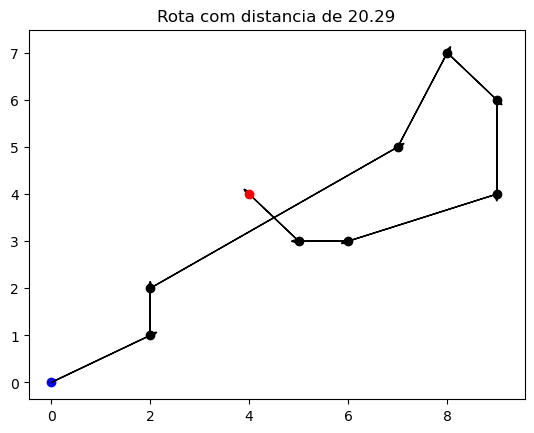

In [32]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = algoritmo_genetico(origem, destino, enderecos)
desenhar_rota(menor_rota)

c:\Users\Filipe\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


21.49473651722891


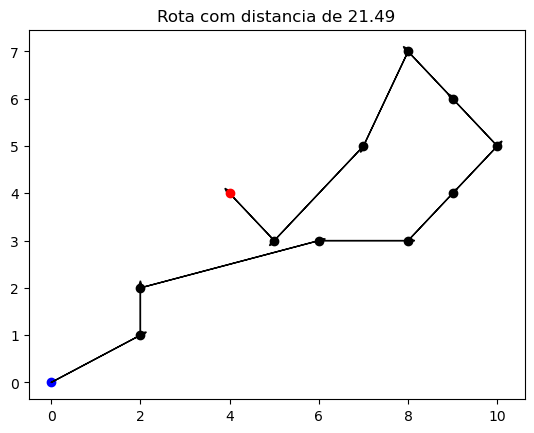

In [33]:

enderecos = [(2,2), (2,1), (5,3), (8,3), (10,5), (9,4), (8,7), (6,3), (9,6), (7,5)]

menor_rota, menor_distancia = algoritmo_genetico(origem, destino, enderecos)
desenhar_rota(menor_rota)

# Usando grafos

In [34]:
!pip install networkx

In [35]:
import networkx as nx

In [36]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2,1), (5,3), (8,3)]

0 (2, 2)
1 (2, 1)
2 (5, 3)
3 (8, 3)


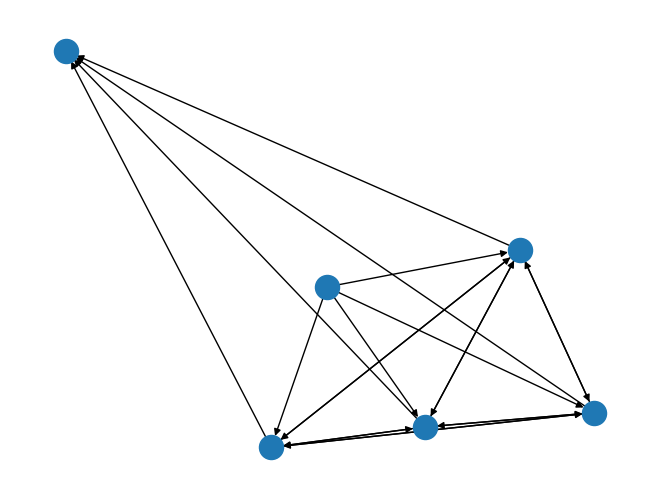

In [37]:
G = nx.DiGraph()
G.add_node('origem', local=origem)
G.add_node('destino', local=destino)

for i, endereco in enumerate(enderecos):
    print(i, endereco)
    G.add_node(i, local=endereco)
        
for i, endereco in enumerate(enderecos):
    G.add_edge('origem', i, distancia=distancia_euclidiana(origem, endereco))
    G.add_edge(i, 'destino', distancia=distancia_euclidiana(endereco, destino))
    for j, endereco2 in enumerate(enderecos):

        if i != j:
            G.add_edge(i, j, distancia=distancia_euclidiana(endereco, endereco2))
        
        
nx.draw(G)



0 (2, 2)
1 (2, 1)
2 (5, 3)
3 (8, 3)


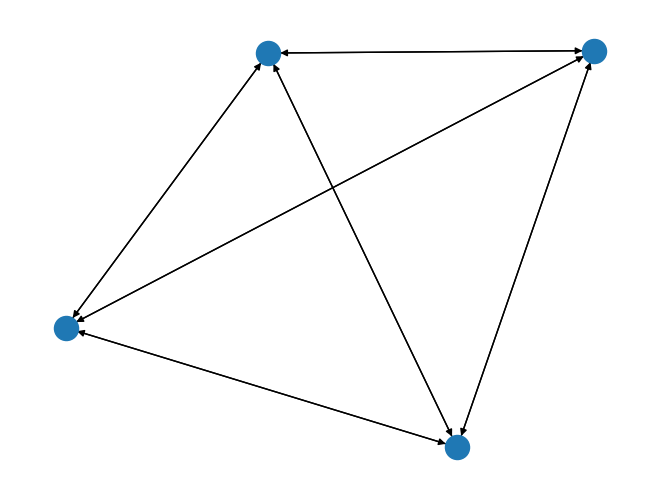

In [38]:
G_teste = nx.DiGraph()

for i, endereco in enumerate(enderecos):
    print(i, endereco)
    G_teste.add_node(i, local=endereco)
        
for i, endereco in enumerate(enderecos):
    for j, endereco2 in enumerate(enderecos):

        if i != j:
            G_teste.add_edge(i, j, weight=distancia_euclidiana(endereco, endereco2))
        
        
nx.draw(G_teste)

# Algoritmo TSP (caixeiro viajante)

In [39]:
tsp = nx.approximation.traveling_salesman_problem(G_teste, weight = 'weight')

print(tsp)

[1, 3, 2, 0, 1]


In [40]:
G = nx.DiGraph()
G.add_node('origem', local=origem)
G.add_node('destino', local=destino)

for i, endereco in enumerate(enderecos):
    # print(i, endereco)
    G.add_node(i, local=endereco)
        
for i, endereco in enumerate(enderecos):
    G.add_edge('origem', i, weight=distancia_euclidiana(origem, endereco))
    G.add_edge(i, 'destino', weight=distancia_euclidiana(endereco, destino))
    for j, endereco2 in enumerate(enderecos):

        if i != j:
            G.add_edge(i, j, weight =distancia_euclidiana(endereco, endereco2))
        
        
        
G.add_edge('destino', 'origem', weight = 0)

ciclo = nx.approximation.traveling_salesman_problem(G, weight = 'weight', cycle = False)


indice_origem = ciclo.index("origem")
ciclo_rotacionado = ciclo[indice_origem:] +ciclo[:indice_origem]
ciclo_rotacionado.remove('origem')
ciclo_rotacionado.remove('destino')

melhor_rota = [origem]

for i in ciclo_rotacionado:
    melhor_rota.append(enderecos[i])
melhor_rota.append(destino)

distancia_percorrida = calcular_distancia_rota(melhor_rota)

print(melhor_rota, distancia_percorrida)

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


In [41]:
def criar_grafo(origem, destino, endereco, flag_fortemente_conexo = False):
    G = nx.DiGraph()
    G.add_node('origem', local=origem)
    G.add_node('destino', local=destino)

    for i, endereco in enumerate(enderecos):
        # print(i, endereco)
        G.add_node(i, local=endereco)
            
    for i, endereco in enumerate(enderecos):
        G.add_edge('origem', i, weight=distancia_euclidiana(origem, endereco))
        G.add_edge(i, 'destino', weight=distancia_euclidiana(endereco, destino))
        for j, endereco2 in enumerate(enderecos):

            if i != j:
                G.add_edge(i, j, weight =distancia_euclidiana(endereco, endereco2))
            
            
    if flag_fortemente_conexo == True:
        G.add_edge('destino', 'origem', weight = 0)
    return G


def algoritmo_em_grafo(origem, destino, enderecos):
    G = criar_grafo(origem, destino, enderecos, flag_fortemente_conexo=True)
    ciclo = nx.approximation.traveling_salesman_problem(G, weight = 'weight', cycle = False)


    indice_origem = ciclo.index("origem")
    ciclo_rotacionado = ciclo[indice_origem:] +ciclo[:indice_origem]
    ciclo_rotacionado.remove('origem')
    ciclo_rotacionado.remove('destino')

    melhor_rota = [origem]

    for i in ciclo_rotacionado:
        melhor_rota.append(enderecos[i])
    melhor_rota.append(destino)

    distancia_percorrida = calcular_distancia_rota(melhor_rota)

    return (melhor_rota, distancia_percorrida)

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583
13.52145126328583


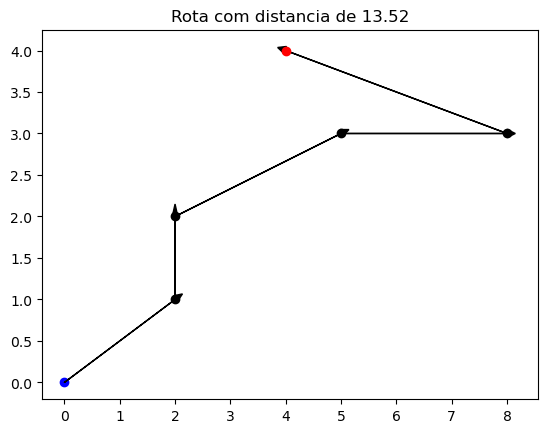

In [42]:
melhor_rota, distancia_percorrida = algoritmo_em_grafo(origem, destino, enderecos)

print(melhor_rota, distancia_percorrida)

desenhar_rota(melhor_rota)



# Programação Matemática

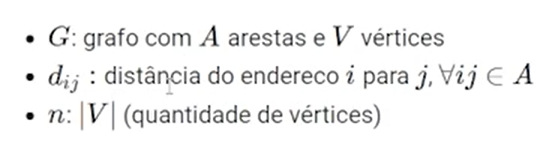

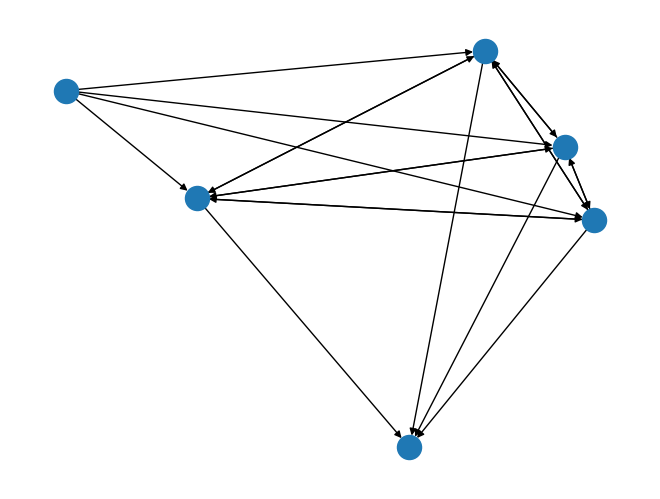

In [43]:
G = criar_grafo(origem, destino, enderecos)
nx.draw(G)

In [44]:
G.get_edge_data(0,3)['weight']

6.082762530298219

In [45]:
n = G.number_of_nodes()
print(n)

6


In [46]:
!pip install ortools

  Obtaining dependency information for ortools from https://files.pythonhosted.org/packages/5f/f6/9ba08e6350554c858ed24e9d67b2068419ab7dc3f4f77303dfdbedfc1dfc/ortools-9.9.3963-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=2.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf>=4.25.3 from https://files.pythonhosted.org/packages/cf/20/576e9d592c5d529c571bf6c61801f761d0488bbfb2e8a5c760a784c9ddef/protobuf-5.26.0-cp310-abi3-win_amd64.whl.metadata
  Obtaining dependency information for immutabledict>=3.0.0 from https://files.pythonhosted.org/packages/e2/13/3cf4ac5b3403f3456e645c4533883ef67b1bb0c72e56b79c707715f57a74/immutabledict-4.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/113.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.1 MB ? eta -:--:--
   --

In [47]:
from ortools.linear_solver import pywraplp

In [48]:
modelo = pywraplp.Solver.CreateSolver("SCIP")

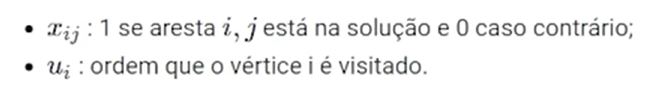

In [49]:
x = {}

for i, j in G.edges():
    x[(i,j)] = modelo.BoolVar(name = f"x[{i,j}]")
    
u = {}
for i in G.nodes():
    u[i] = modelo.NumVar(lb = 1.0, ub = n, name = f'u[{i}]')

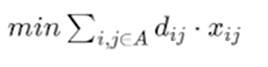

In [50]:
modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))

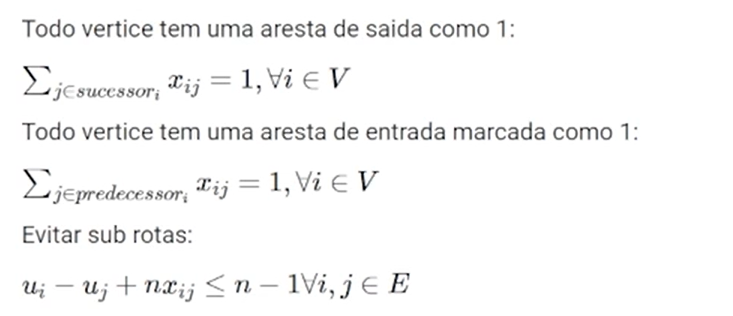

In [51]:
for i in G.nodes():
    if i!= 'destino':
        modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)
    if i!= 'origem':
        modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

for i, j in G.edges():
    modelo.Add(u[i] - u[j] + n*x[i,j] <= n-1)


In [52]:
status = modelo.Solve()

In [53]:

if status == pywraplp.Solver.OPTIMAL:
    print("Solução Ótima!")
    print(modelo.Objective().Value())
    for i, j in G.edges():
        if x[i,j].solution_value() > 0:
            print(f"{i} para {j} com valor: {x[i,j].solution_value()}")
            
    for i in G.nodes():
        print(i, u[i].solution_value())

Solução Ótima!
13.52145126328583
origem para 1 com valor: 1.0
0 para 2 com valor: 1.0
1 para 0 com valor: 1.0
2 para 3 com valor: 1.0
3 para destino com valor: 1.0
origem 1.0
destino 6.0
0 3.0
1 2.0
2 4.0
3 5.0


In [54]:
melhor_rota = []
distancia_percorrida = float('inf')

status_descricao = {pywraplp.Solver.OPTIMAL: "Ótima", pywraplp.Solver.FEASIBLE: "Viável"}

if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print("Solução ", status_descricao[status])
    distancia_percorrida = modelo.Objective().Value()
    
    melhor_rota = [0]*n
    for i in G.nodes():
        indice = round(u[i].solution_value()) -1
        melhor_rota[indice] = G.nodes[i]["local"]
        
        
print(melhor_rota)

Solução Ótima!
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)]


13.52145126328583


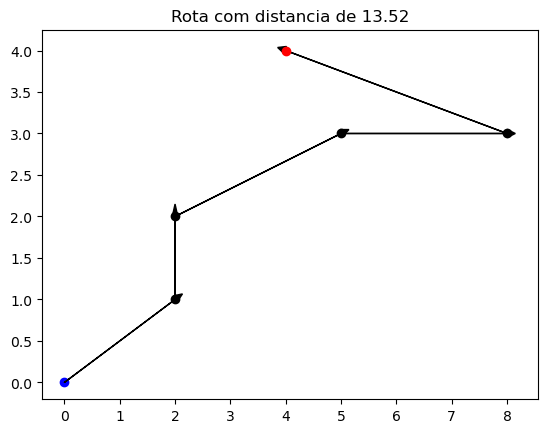

In [55]:
desenhar_rota(melhor_rota)

In [56]:
def modelo_matematico(origem, destino, enderecos):
    G = criar_grafo(origem, destino, enderecos)
    n = G.number_of_nodes()
    
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    
    
    
    #Variáveis de decisão
    
    x = {}
    for i, j in G.edges():
        x[(i,j)] = modelo.BoolVar(name = f"x[{i,j}]")
    
    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb = 1.0, ub = n, name = f'u[{i}]')
        
    # Função Objetivo
    
    modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))
    
    # Restrições
    for i in G.nodes():
        if i!= 'destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)
        if i!= 'origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    for i, j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n-1)

    #Resolução
    
    status = modelo.Solve()
    
    #Formatação dos resultados
    
    melhor_rota = []
    distancia_percorrida = float('inf')

    status_descricao = {pywraplp.Solver.OPTIMAL: "Ótima", pywraplp.Solver.FEASIBLE: "Viável"}

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()
        
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value()) -1
            melhor_rota[indice] = G.nodes[i]["local"]
    
    return melhor_rota, distancia_percorrida

In [57]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5), (9, 1), (11, 10), (3, 6), (10, 10)]


Solução Ótima!
35.13576955099495


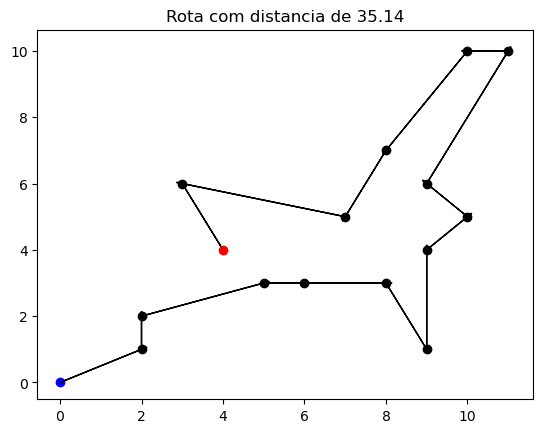

In [60]:
melhor_rota, distancia_percorrida = modelo_matematico(origem, destino, enderecos)

desenhar_rota(melhor_rota)

Quando acionamos o SCIP para encontrar uma solução para o nosso modelo, ele retorna um "status" que nos dá informações valiosas sobre a solução encontrada. Para nós, mesmo uma solução "viável" já é bastante útil, mas é importante entender o que cada status significa:

Ótimo (OPTIMAL): este é o melhor cenário possível. O solver encontrou uma solução que é garantidamente a melhor dentro das restrições do modelo. Se o status for Ótimo, podemos ter certeza de que não há uma solução melhor dentro do espaço de soluções viáveis.
Viável (FEASIBLE): indica que o solver encontrou uma solução que atende a todas as restrições, mas não pode garantir que é a melhor solução possível. Para o nosso problema de roteamento, uma solução viável já é bastante útil.
Inviável (INFEASIBLE): é um cenário em que o solver determina que não há nenhuma solução que atenda a todas as restrições do modelo. Isso geralmente indica que há algo errado com a formulação do modelo ou com os dados de entrada.
Ilimitado (UNBOUNDED): este status é raro em problemas práticos e geralmente ocorre em modelos mal formulados. Significa que a função objetivo pode ser melhorada indefinidamente sem violar nenhuma das restrições.
Anormal (ABNORMAL): indica que algo deu errado durante o processo de solução, como um erro de memória ou outro problema técnico.
Não Resolvido (NOT_SOLVED): este status é retornado quando o solver não pôde concluir o processo de solução, geralmente devido a limitações de tempo ou recursos computacionais.

In [62]:
status_dict = {
    pywraplp.Solver.OPTIMAL: 'Ótimo',
    pywraplp.Solver.FEASIBLE: 'Viável',
    pywraplp.Solver.INFEASIBLE: 'Inviável',
    pywraplp.Solver.UNBOUNDED: 'Ilimitado',
    pywraplp.Solver.ABNORMAL: 'Anormal',
    pywraplp.Solver.NOT_SOLVED: 'Não Resolvido'
}

#Status possível


# Combinação de métodos (Heurísticas e modelo matemático)

In [63]:
def modelo_matematico(origem, destino, enderecos):
    G = criar_grafo(origem, destino, enderecos)
    n = G.number_of_nodes()
    
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    
    modelo.SetTimeLimit(60*1000)
    
    #Variáveis de decisão
    
    x = {}
    for i, j in G.edges():
        x[(i,j)] = modelo.BoolVar(name = f"x[{i,j}]")
    
    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb = 1.0, ub = n, name = f'u[{i}]')
        
    # Função Objetivo
    
    modelo.Minimize(sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges()))
    
    # Restrições
    for i in G.nodes():
        if i!= 'destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)
        if i!= 'origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    for i, j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n-1)

    #Resolução
    
    status = modelo.Solve()
    
    #Formatação dos resultados
    
    melhor_rota = []
    distancia_percorrida = float('inf')

    status_descricao = {pywraplp.Solver.OPTIMAL: "Ótima", pywraplp.Solver.FEASIBLE: "Viável"}

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()
        
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value()) -1
            melhor_rota[indice] = G.nodes[i]["local"]
    
    return melhor_rota, distancia_percorrida

In [93]:
def modelo_matematico_com_heuristica(origem, destino, enderecos):
    G = criar_grafo(origem, destino, enderecos)
    n = G.number_of_nodes()
    
    rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem, destino, enderecos)
    
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    
    modelo.SetTimeLimit(60*1000)
    
    #Variáveis de decisão
    
    x = {}
    for i, j in G.edges():
        x[(i,j)] = modelo.BoolVar(name = f"x[{i,j}]")
    
    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb = 1.0, ub = n, name = f'u[{i}]')
        
    # Função Objetivo
    expr_distancia = sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges())
    modelo.Minimize(expr_distancia)
    
    # Restrições

    modelo.Add(expr_distancia <= distancia_heuristica)
    
    for i in G.nodes():
        if i!= 'destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)
        if i!= 'origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    for i, j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n-1)

    #Resolução
    
    status = modelo.Solve()
    
    #Formatação dos resultados
    
    melhor_rota = rota_heuristica
    distancia_percorrida = distancia_heuristica

    status_descricao = {pywraplp.Solver.OPTIMAL: "Ótima", pywraplp.Solver.FEASIBLE: "Viável"}

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()
        
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value()) -1
            melhor_rota[indice] = G.nodes[i]["local"]
    
    return melhor_rota, distancia_percorrida

In [94]:
origem = (0,0)
destino = (4,4)

import random

enderecos =[(random.randint(0,100),random.randint(0,100)) for i in range(20)]

print(enderecos)

[(24, 67), (4, 21), (61, 33), (33, 38), (16, 81), (79, 81), (70, 95), (98, 89), (5, 48), (48, 68), (15, 83), (63, 50), (72, 7), (32, 49), (32, 83), (20, 38), (58, 66), (33, 87), (87, 10), (57, 32)]


In [95]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)




Solução  Viável
437.3655975124207


437.3655975124208


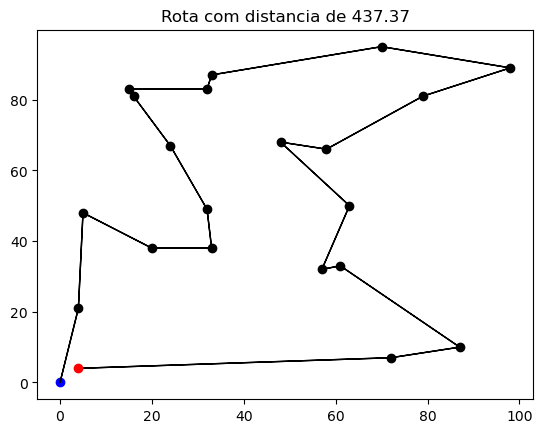

In [96]:
desenhar_rota(menor_rota)

In [97]:
origem = (0,0)
destino = (4,4)

import random

enderecos =[(random.randint(0,100),random.randint(0,100)) for i in range(30)]

print(enderecos)

[(76, 40), (80, 58), (77, 94), (76, 77), (31, 68), (62, 65), (0, 0), (4, 29), (15, 79), (95, 96), (72, 17), (56, 18), (71, 34), (39, 75), (16, 68), (35, 4), (34, 70), (30, 96), (96, 1), (87, 100), (38, 22), (6, 98), (81, 15), (41, 67), (36, 26), (29, 19), (81, 82), (81, 2), (52, 19), (48, 96)]


In [98]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)




Solução  Viável
511.6472156958832


511.6472156958833


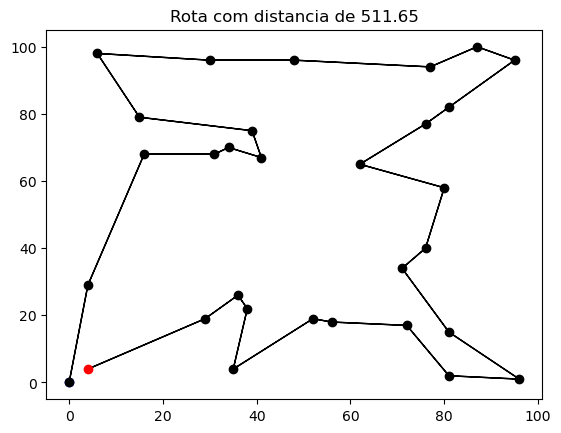

In [99]:
desenhar_rota(menor_rota)

In [78]:
origem = (0,0)
destino = (4,4)

import random

enderecos =[(random.randint(0,100),random.randint(0,100)) for i in range(70)]

print(enderecos)

[(16, 63), (81, 97), (56, 49), (57, 87), (77, 70), (92, 99), (10, 72), (2, 99), (89, 5), (5, 53), (37, 60), (65, 57), (82, 87), (48, 92), (15, 60), (13, 35), (30, 63), (22, 20), (68, 97), (9, 6), (46, 7), (20, 79), (89, 15), (47, 3), (71, 58), (53, 31), (74, 70), (30, 53), (87, 81), (26, 77), (93, 87), (94, 28), (8, 69), (56, 10), (75, 71), (81, 31), (4, 35), (54, 48), (75, 15), (70, 16), (70, 73), (81, 69), (50, 19), (15, 2), (24, 0), (80, 65), (80, 68), (36, 67), (9, 63), (43, 68), (56, 8), (70, 94), (67, 30), (47, 16), (91, 76), (21, 10), (53, 3), (1, 59), (52, 58), (100, 13), (2, 0), (29, 25), (98, 66), (49, 16), (20, 30), (63, 94), (64, 33), (86, 96), (89, 58), (5, 70)]


In [79]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)




Solução Ótima!
874.319474034609


874.3194740346092


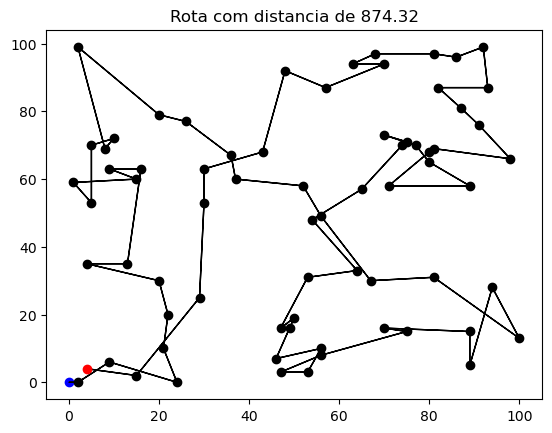

In [80]:
desenhar_rota(menor_rota)

# Comparando modelos para avaliar o quão bom ele é

$gap = \frac{|resultado - melhor\_bound|}{resultado}$


In [103]:
def modelo_matematico_com_heuristica(origem, destino, enderecos):
    G = criar_grafo(origem, destino, enderecos)
    n = G.number_of_nodes()
    
    rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem, destino, enderecos)
    
    modelo = pywraplp.Solver.CreateSolver("SCIP")
    
    modelo.SetTimeLimit(60*1000)
    
    #Variáveis de decisão
    
    x = {}
    for i, j in G.edges():
        x[(i,j)] = modelo.BoolVar(name = f"x[{i,j}]")
    
    u = {}
    for i in G.nodes():
        u[i] = modelo.NumVar(lb = 1.0, ub = n, name = f'u[{i}]')
        
    # Função Objetivo
    expr_distancia = sum(G.get_edge_data(i,j)['weight']*x[i,j] for i,j in G.edges())
    modelo.Minimize(expr_distancia)
    
    # Restrições

    modelo.Add(expr_distancia <= distancia_heuristica)
    
    for i in G.nodes():
        if i!= 'destino':
            modelo.Add(sum(x[i,j] for j in G.successors(i)) == 1)
        if i!= 'origem':
            modelo.Add(sum(x[j,i] for j in G.predecessors(i)) == 1)

    for i, j in G.edges():
        modelo.Add(u[i] - u[j] + n*x[i,j] <= n-1)

    #Resolução
    
    status = modelo.Solve()
    
    #Formatação dos resultados
    
    melhor_rota = rota_heuristica
    distancia_percorrida = distancia_heuristica

    status_descricao = {pywraplp.Solver.OPTIMAL: "Ótima", pywraplp.Solver.FEASIBLE: "Viável"}

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print("Solução ", status_descricao[status])
        distancia_percorrida = modelo.Objective().Value()
        melhor_bound = modelo.Objective().BestBound()
        
        
        gap = 100 * abs(distancia_percorrida - melhor_bound) / distancia_percorrida
        print("gap = ", gap)
        
        melhor_rota = [0]*n
        for i in G.nodes():
            indice = round(u[i].solution_value()) -1
            melhor_rota[indice] = G.nodes[i]["local"]
    
    return melhor_rota, distancia_percorrida

In [104]:
origem = (0,0)
destino = (4,4)

import random

enderecos =[(random.randint(0,100),random.randint(0,100)) for i in range(20)]

print(enderecos)

[(83, 45), (76, 75), (18, 100), (16, 33), (4, 24), (76, 76), (72, 94), (71, 26), (57, 62), (22, 84), (13, 85), (76, 11), (32, 32), (34, 73), (98, 37), (34, 29), (66, 17), (10, 86), (8, 6), (10, 83)]


In [105]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)




Solução  Viável
gap =  14.611690273838637
416.31526133793545


435.2714085121779


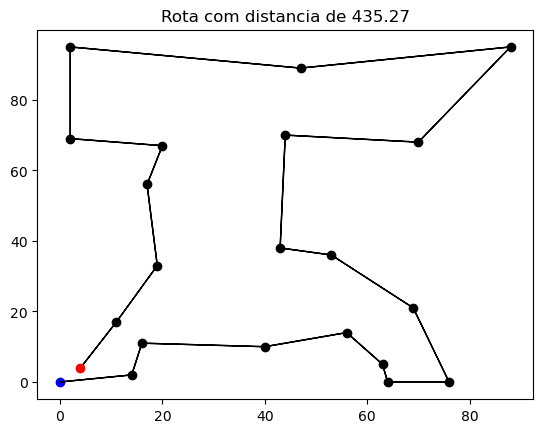

In [102]:
desenhar_rota(menor_rota)

### Para minimização

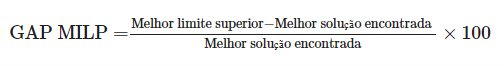

### Para maximização

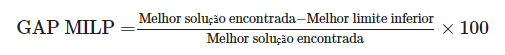

## Desafio: Otimização de rota para um dia de passeio

Você tem um dia livre e decidiu visitar 10 lugares que sempre quis conhecer. Além disso, você tem uma origem, que pode ser sua casa, e um destino final, que pode ser a casa de uma pessoa amiga ou familiar. O desafio é encontrar a rota mais curta que começa na sua casa, passa por todos os 10 lugares que você quer visitar e termina no destino final.

Instruções
Seleção de endereços: escolha 10 lugares que você gostaria de visitar e anote suas respectivas coordenadas geográficas (latitude e longitude).
Origem e destino: selecione uma origem (por exemplo, sua casa) e um destino final (por exemplo, a casa de um amigo ou familiar). Anote também suas coordenadas geográficas.
Implementação do algoritmo: utilize um algoritmo de otimização para encontrar a rota mais curta. Você pode se inspirar no algoritmo de otimização de entregas que discutimos, adaptando-o para este cenário.
Objetivo
O objetivo é minimizar a distância total percorrida, garantindo que você passe por todos os 10 lugares selecionados, começando na origem e terminando no destino.

Dicas
Você pode utilizar bibliotecas de programação matemática como OR-Tools e solvers como SCIP para resolver este problema.
Os modelos construídos no curso são mais que suficientes para começar a otimização do seu passeio. A princípio é necessário apenas adicionar a restrição das suas preferências de ordem, como do restaurante e sorveteria.
Considere utilizar heurísticas para tornar o modelo mais eficiente, especialmente se decidir adicionar mais lugares para visitar.

In [106]:
origem = (-22.860724, -43.243367)
destino = (-22.911147, -43.236961)

import random

enderecos =[(-22.984836, -43.223491), (-22.984557, -43.188991), (-22.900824, -43.176447), (-22.898665, -43.131786),(-22.861171, -43.225653), (-22.867022, -43.253866),(-22.865223, -43.242408),(-22.875115, -43.246607), (-22.986924, -43.201772), (-22.953442, -43.282742)]

print(enderecos)

[(-22.984836, -43.223491), (-22.984557, -43.188991), (-22.900824, -43.176447), (-22.898665, -43.131786), (-22.861171, -43.225653), (-22.867022, -43.253866), (-22.865223, -43.242408), (-22.875115, -43.246607), (-22.986924, -43.201772), (-22.953442, -43.282742)]


In [107]:
menor_rota, distancia_percorrida = modelo_matematico_com_heuristica(origem, destino, enderecos)
print(distancia_percorrida)




Solução  Ótima
gap =  0.0
0.4264046136061521


0.4264046136061521


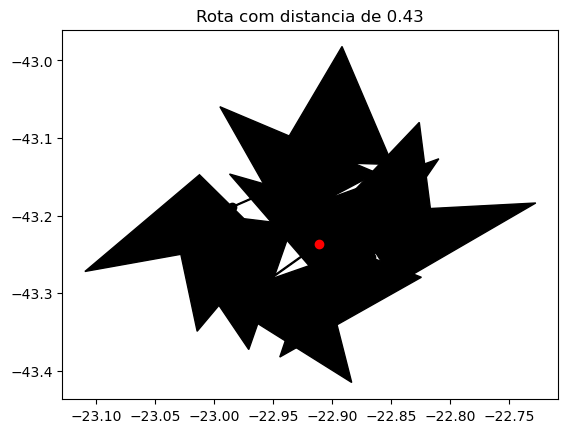

In [108]:
desenhar_rota(menor_rota)